In [5]:
import pandas as pd

# 1. Cargar la base
df = pd.read_csv(
    "/Users/solgoren/Desktop/UdeSA/Ciencia de datos/TP Final/Base Aprender.csv",
    sep=";",       # si no funciona con "," probá con ";"
    encoding="latin1"  # si no funciona, probá "utf-8"
)

# 2. Dimensiones de la base
print("Dimensiones (filas, columnas):", df.shape)

# 3. Primeras filas (para mostrar ejemplos)
print(df.head())

# 4. Información general: tipos de variables y nulos
print("\nInformación de las columnas:")
print(df.info())

# 5. Resumen estadístico de las variables numéricas
print("\nResumen estadístico (solo numéricas):")
print(df.describe())

# 6. Ver algunas variables categóricas (ejemplo con 'provincia' o 'genero')
if 'provincia' in df.columns:
    print("\nDistribución por provincia:")
    print(df['provincia'].value_counts().head(10))

if 'genero' in df.columns:
    print("\nDistribución por género:")
    print(df['genero'].value_counts())


Dimensiones (filas, columnas): (642006, 206)
           ï»¿ID1  jurisdiccion  seccion  idalumno  sector  ambito ap01 ap02  \
0  20004002000400            50        1    247287       1       2    2    1   
1  20004002000400            50        2    247266       1       2    3    9   
2  20004002000400            50        1    247288       1       2    3    9   
3  20004002000400            50        1    247289       1       2    2    1   
4  20004002000400            50        1    247290       1       2    2   12   

  ap03 ap04  ...   mpuntaje  NSE_puntaje NSE_nivel edadA_junio2023 migracion  \
0    1    1  ...  466,75851  ,0057786424         2               2         2   
1    1    1  ...  455,46713   -,36903167         2               2         2   
2    1    1  ...  356,53931   -,50107211         2               2         2   
3    1    1  ...  449,15985    ,59687847         2               2         2   
4    1    1  ...  444,71057    ,92589754         2               2        

In [9]:
# Seleccionar variables clave
vars_seleccion = ['ldesemp', 'mdesemp', 'Nivel_Ed_Madre','Nivel_Ed_Padre', 'ap01']  # cambia 'niv_madre' según cómo figure en tu base
df_sel = df[vars_seleccion]

print(df_sel.head())

  ldesemp mdesemp  Nivel_Ed_Madre  Nivel_Ed_Padre ap01
0       4       3               4               1    2
1       3       2               3               3    3
2               1               7               7    3
3       2       2               7               5    2
4       3       2               7               7    2


## Proceso de limpieza y tratamiento de missing values

In [10]:
# Ver cuántos valores faltantes hay por columna
print(df.isnull().sum())

# Ver el porcentaje de faltantes por variable
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

ï»¿ID1            0
jurisdiccion      0
seccion           0
idalumno          0
sector            0
                 ..
sobreedad         0
Nivel_Ed_Madre    0
Nivel_Ed_Padre    0
region            0
clima_escolar     0
Length: 206, dtype: int64
ï»¿ID1           0.0
apA36f           0.0
apA35i           0.0
apA35j           0.0
apA35k           0.0
                ... 
ap20d1           0.0
ap20d2           0.0
ap21             0.0
ap22             0.0
clima_escolar    0.0
Length: 206, dtype: float64


In [14]:
#Identificar esas categorías especiales en las variables de interés

print(df['Nivel_Ed_Madre'].value_counts())
print(df['Nivel_Ed_Padre'].value_counts())

Nivel_Ed_Madre
 7    199577
 5    172911
 4    104625
 2     49773
 3     46684
 6     41108
-9     20490
 1      6838
Name: count, dtype: int64
Nivel_Ed_Padre
 5    168824
 7    161586
 4    125202
 2     68680
 3     48134
 6     36209
-9     21917
 1     11454
Name: count, dtype: int64


In [15]:
#Reemplazarlos por NaN (para tratarlos como verdaderos missing)

import numpy as np

# Definir los códigos de missing
missing_codes = [-9, -8, -6]

# Reemplazar en las variables relevantes
df['Nivel_Ed_Madre'] = df['Nivel_Ed_Madre'].replace(missing_codes, np.nan)
df['Nivel_Ed_Padre'] = df['Nivel_Ed_Padre'].replace(missing_codes, np.nan)

In [17]:
print(df[['Nivel_Ed_Madre', 'Nivel_Ed_Padre']].isnull().sum())

Nivel_Ed_Madre    20490
Nivel_Ed_Padre    21917
dtype: int64


In [19]:
#Eliminar filas con missing
df_clean = df.dropna(subset=['Nivel_Ed_Madre', 'Nivel_Ed_Padre'])
print(df_clean.shape)

(619570, 206)


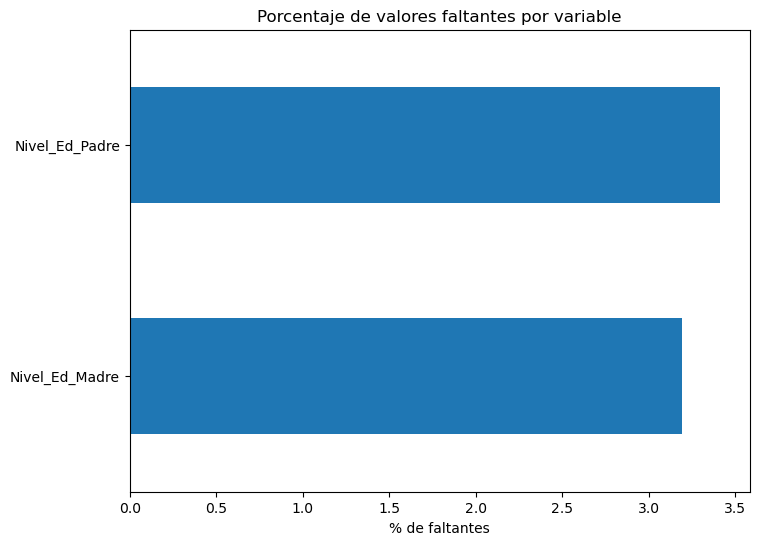

In [20]:
import matplotlib.pyplot as plt

missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values()

missing_percent.plot(kind='barh', figsize=(8,6))
plt.title("Porcentaje de valores faltantes por variable")
plt.xlabel("% de faltantes")
plt.show()

## HEATMAP

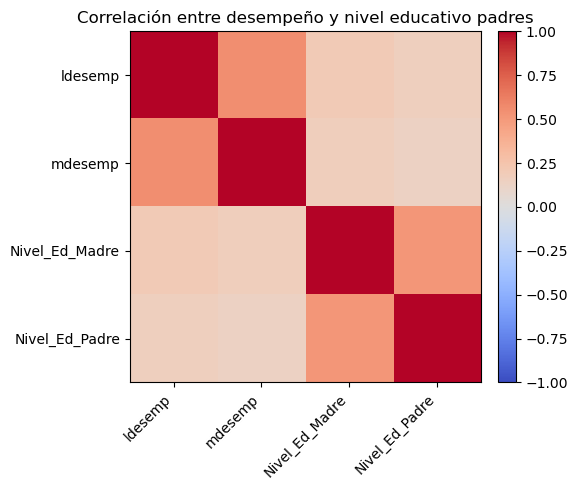

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Subset de variables clave
cols = ['ldesemp', 'mdesemp', 'Nivel_Ed_Madre', 'Nivel_Ed_Padre']
df_sub = df_clean[cols].apply(pd.to_numeric, errors='coerce')

# Calcular matriz de correlación
corr = df_sub.corr()

# Graficar heatmap simple con matplotlib
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr.values, cmap="coolwarm", vmin=-1, vmax=1)

# Títulos y etiquetas
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.index)

plt.title("Correlación entre desempeño y nivel educativo padres")
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()